# Classification of Fire Types in India Using MODIS Satellite Data (2021–2023)
India witnesses various types of fire incidents annually, including forest fires, agricultural burning, volcanic activity, and other thermal anomalies. Accurate identification of fire sources is crucial for timely disaster response, environmental monitoring, and resource management. The MODIS sensors aboard NASA’s Terra and Aqua satellites provide reliable, near real-time thermal anomaly data globally, including for India.

While the MODIS dataset includes rich geospatial and thermal parameters, the challenge lies in correctly classifying the type of fire event — whether it stems from vegetation, volcanoes, static land sources, or offshore sources — using satellite-captured features.

Objective:
To develop a machine learning classification model that can accurately predict the type of fire using MODIS fire detection data for India from 2021 to 2023

🔥 MODIS Dataset Summary (India: 2021–2023)
📌 About MODIS:
The Moderate Resolution Imaging Spectroradiometer (MODIS) is a key NASA sensor aboard the Terra (launched 1999) and Aqua (launched 2002) satellites. It captures Earth observation data at a spatial resolution of 1 km, suitable for global fire monitoring and environmental studies.

MODIS data used in this project is sourced from NASA’s FIRMS (Fire Information for Resource Management System) and focuses on thermal anomalies and active fire detection.

🛰️ Satellite Characteristics:
Terra satellite (EOS AM) captures morning overpasses.

Aqua satellite (EOS PM) captures afternoon overpasses.

MODIS provides 2–4 observations per day, especially in mid-latitudes like India.

🔍 Fire Detection Mechanism:
MODIS uses contextual algorithms to detect thermal anomalies.

It evaluates each pixel using mid-infrared channels (Bands 21/22 for fire detection and 31 for surface temperature).

The pixel is marked as one of: missing, cloud, water, non-fire, fire, or unknown.

⚠️ Note on Accuracy:
MODIS NRT (Near Real-Time) data may have slightly lower geolocation accuracy, particularly from Aqua satellite due to orbit estimation delays. Errors can occasionally reach several kilometers.

✅ Use Cases for MODIS Fire Data:
Real-time wildfire alerts

Agricultural burn detection

Forest fire management

Hotspot pattern analysis in ecological studies

📚 Reference Links:
🔗 NASA FIRMS Documentation

🔗 MODIS Active Fire Product Info (LP DAAC)

🔗 Understanding MODIS Fire Algorithm

🔬 Important Parameters in MODIS Data:
Screenshot 2025-06-08 005657.png

📚 Reference Links:
🔗 NASA FIRMS Documentation

🔗 Global Fire Data Access Portal



In [4]:
pip install xgboost

                                              0.0/150.0 MB ? eta -:--:--
                                            0.0/150.0 MB 991.0 kB/s eta 0:02:32
                                              0.1/150.0 MB 1.1 MB/s eta 0:02:18
                                              0.3/150.0 MB 1.7 MB/s eta 0:01:26
                                              0.3/150.0 MB 1.7 MB/s eta 0:01:27
                                              0.5/150.0 MB 2.0 MB/s eta 0:01:15
                                              0.6/150.0 MB 2.1 MB/s eta 0:01:12
                                              0.7/150.0 MB 2.3 MB/s eta 0:01:04
                                              0.9/150.0 MB 2.5 MB/s eta 0:01:01
                                              1.0/150.0 MB 2.6 MB/s eta 0:00:58
                                              1.2/150.0 MB 2.7 MB/s eta 0:00:55
                                              1.3/150.0 MB 2.8 MB/s eta 0:00:54
                                              1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# Load the dataset

In [7]:
df1 = pd.read_csv("C:\\Users\\saisu\\Downloads\\modis_2021_India.csv")
df2 = pd.read_csv("C:\\Users\\saisu\\Downloads\\modis_2022_India.csv")
df3 = pd.read_csv("C:\\Users\\saisu\\Downloads\\modis_2023_India.csv")

In [8]:
df1.head() # print first 5 rows - df1.tail()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [9]:
df2.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,30.1138,80.0756,300.0,1.2,1.1,2022-01-01,511,Terra,MODIS,7,6.03,288.4,7.1,D,0
1,23.7726,86.2078,306.1,1.6,1.2,2022-01-01,512,Terra,MODIS,62,6.03,293.5,10.4,D,2
2,22.2080,84.8627,304.8,1.4,1.2,2022-01-01,512,Terra,MODIS,42,6.03,293.3,5.8,D,2
3,23.7621,86.3946,306.9,1.6,1.2,2022-01-01,512,Terra,MODIS,38,6.03,295.2,9.3,D,2
4,23.6787,86.0891,303.6,1.5,1.2,2022-01-01,512,Terra,MODIS,52,6.03,293.1,7.2,D,2


In [22]:
df3.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,9.3280,77.6247,318.0,1.1,1.0,2023-01-01,821,Aqua,MODIS,62,61.03,305.0,7.6,D,0
1,10.4797,77.9378,313.8,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,299.4,4.3,D,0
2,13.2478,77.2639,314.7,1.0,1.0,2023-01-01,822,Aqua,MODIS,55,61.03,302.4,4.9,D,0
3,12.2994,78.4085,314.3,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,301.9,4.8,D,0
4,14.1723,75.5024,338.4,1.2,1.1,2023-01-01,823,Aqua,MODIS,88,61.03,305.3,41.5,D,0


In [11]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [12]:
df.shape # rows and cols

(271217, 15)

In [13]:
df.info() # dt, memc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271217 entries, 0 to 271216
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    271217 non-null  float64
 1   longitude   271217 non-null  float64
 2   brightness  271217 non-null  float64
 3   scan        271217 non-null  float64
 4   track       271217 non-null  float64
 5   acq_date    271217 non-null  object 
 6   acq_time    271217 non-null  int64  
 7   satellite   271217 non-null  object 
 8   instrument  271217 non-null  object 
 9   confidence  271217 non-null  int64  
 10  version     271217 non-null  float64
 11  bright_t31  271217 non-null  float64
 12  frp         271217 non-null  float64
 13  daynight    271217 non-null  object 
 14  type        271217 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 31.0+ MB


In [14]:
# Any missing values?
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
# List out column names to check
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [17]:
df.describe().T # statistics of dataset - numbers!

,count,mean,std,min,25%,50%,75%,max
latitude,271217.0,23.947505,4.919846,8.1362,20.9655,23.7888,27.7827,34.9734
longitude,271217.0,81.284024,6.559071,68.4526,75.8802,79.3209,84.7559,97.1044
brightness,271217.0,323.719192,14.147221,300.0000,314.5000,322.0000,330.7000,505.7000
scan,271217.0,1.421732,0.630742,1.0000,1.0000,1.2000,1.5000,4.8000
track,271217.0,1.152716,0.201943,1.0000,1.0000,1.1000,1.2000,2.0000
acq_time,271217.0,824.623755,353.966965,321.0000,648.0000,756.0000,825.0000,2202.0000
confidence,271217.0,64.065081,18.165329,0.0000,54.0000,66.0000,76.0000,100.0000
version,271217.0,21.933778,24.935515,6.0300,6.0300,6.0300,61.0300,61.0300
bright_t31,271217.0,303.499177,8.282440,267.2000,298.2000,302.5000,309.2000,400.1000
frp,271217.0,27.722058,81.017471,0.0000,8.7000,13.5000,24.5000,6961.8000


In [18]:
# Check Unique values of target variable
df.type.value_counts()

0    257625
2     13550
3        42
Name: type, dtype: int64

# Exploratory Data Analysis (EDA)

In [19]:
# Check unique and n unique for all categorical features
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 50)

Column: acq_date
Unique values: ['2021-01-01' '2021-01-02' '2021-01-03' ... '2023-12-29' '2023-12-30'
 '2023-12-31']
Number of unique values: 1088
--------------------------------------------------
Column: satellite
Unique values: ['Terra' 'Aqua']
Number of unique values: 2
--------------------------------------------------
Column: instrument
Unique values: ['MODIS']
Number of unique values: 1
--------------------------------------------------
Column: daynight
Unique values: ['D' 'N']
Number of unique values: 2
--------------------------------------------------


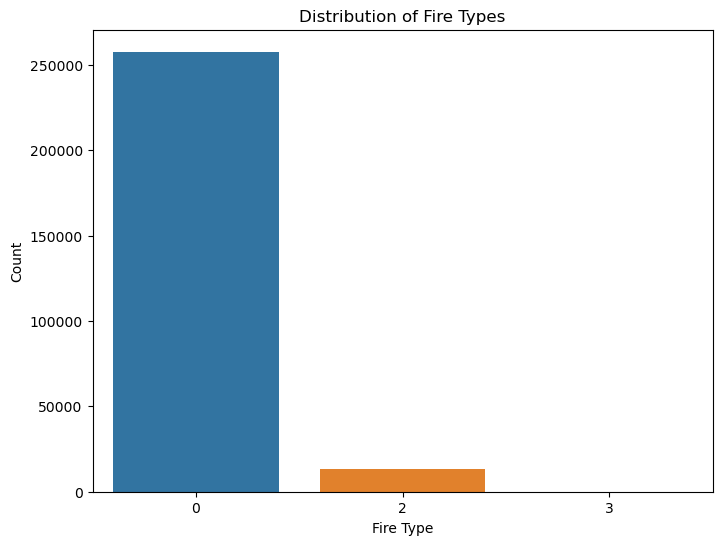

In [20]:
# Count plot for 'type'
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Fire Types')
plt.xlabel('Fire Type')
plt.ylabel('Count')
plt.show()


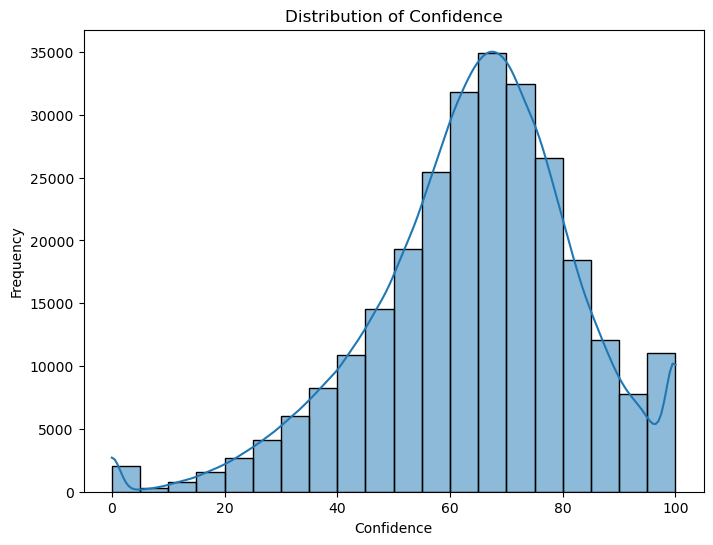

In [21]:
# Histogram of 'confidence'
plt.figure(figsize=(8, 6))
sns.histplot(df['confidence'], bins=20, kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

The histogram illustrates the distribution of the 'confidence' feature.
The distribution appears to be bimodal, with peaks around low confidence values and high confidence values.
There are fewer observations in the middle range of confidence.
This suggests that observations are often recorded with either low confidence or high confidence.